In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

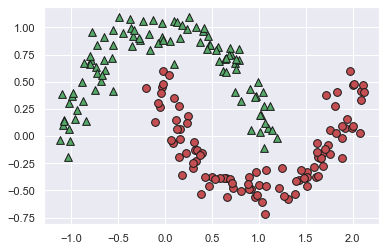

In [2]:
from sklearn.datasets import make_moons
N=200

#Generating Data.
X,y= make_moons(n_samples=N, noise=0.1)

#Splitting into Train and Test Data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Plotting the Dataset.
for i in range(0,200):
    if y[i]==1:
        plt.scatter(X[i,0],X[i,1],edgecolor='k',marker='o',facecolor='r',s=60);
    else:
        plt.scatter(X[i,0],X[i,1],edgecolor='k',marker='^',facecolor='g',s=60);

In [189]:
#Function to plot Support Vectors.
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y_train, X_train = np.meshgrid(y, x)
    xy = np.vstack([X_train.ravel(), Y_train.ravel()]).T
    P = model.decision_function(xy).reshape(X_train.shape)
    
    # plot decision boundary and margins
    ax.contour(X_train, Y_train, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],edgecolors='k',
                   s=N, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

In [190]:
#Function to plot Dataset.
def plot_scatter_plot():
    for i in range(0,len(X_train)):
        if y_train[i]==1:
            plt.scatter(X_train[i,0],X_train[i,1],edgecolor='k',marker='o',facecolor='r',s=100);
        else:
            plt.scatter(X_train[i,0],X_train[i,1],edgecolor='k',marker='^',facecolor='g',s=100);


In [191]:
#Function to plot the predicted labels and actual labels with different markers.
def plot_predictions():
    for i in range(0,len(X_test)):
        if y_test[i]==0 and y_predict[i]==0:
            plt.scatter(X_test[i,0],X_test[i,1],facecolor='g',edgecolors='k',marker='^',s=100)
        elif y_test[i]==0 and y_predict[i]==1:
            plt.scatter(X_test[i,0],X_test[i,1],facecolor='b',edgecolors='k',marker='s',s=100)
        elif y_test[i]==1 and y_predict[i]==1:
            plt.scatter(X_test[i,0],X_test[i,1],facecolor='r',edgecolors='k',marker='d',s=100)
        elif y_test[i]==1 and y_predict[i]==0:
            plt.scatter(X_test[i,0],X_test[i,1],facecolor='y',edgecolors='k',marker='o',s=100)

In [192]:
#Linear SVM.
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

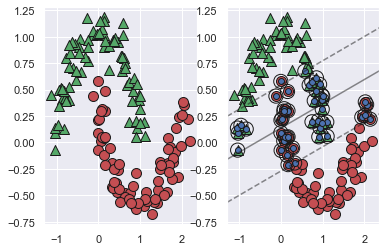

In [193]:
plt.subplot(1,2,1)
plot_scatter_plot()

plt.subplot(1,2,2)
plot_scatter_plot()
plot_svc_decision_function(model);
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],facecolor='b',edgecolors='k')

In [194]:
#10-Fold Cross-validation using Training Data.
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=10)
kfold=cross_val_score(model,X_train,y_train,cv=kf,scoring='accuracy')
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9974999999999999


In [195]:
#Predicting the outputs using the built model.
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(model,X_train,y_train,cv=10)

#Confusion Matrix and Accuracy Scores.
from sklearn.metrics import confusion_matrix,accuracy_score
confusion=confusion_matrix(y_train,y_train_pred)
print(confusion)
accuracy=accuracy_score(y_train,y_train_pred)
print("Accuracy: ",accuracy)


[[69  8]
 [ 9 64]]
Accuracy:  0.8866666666666667


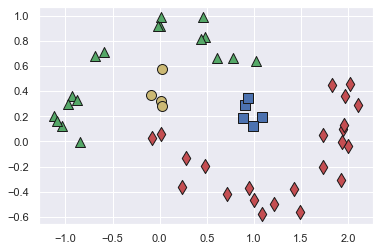

In [196]:
#Plotting the Predicted model.
y_predict=model.predict(X_test)
plot_predictions()

<AxesSubplot:>

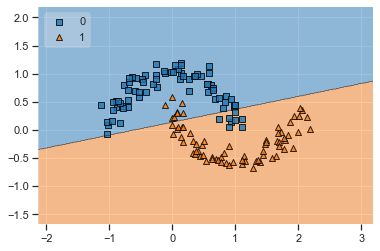

In [197]:
#Plotting the Decision Regions.
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train,clf=model,legend=2)

In [198]:
#Quadratic SVM.
model=SVC(kernel='poly',degree=2)
model.fit(X_train,y_train)

SVC(degree=2, kernel='poly')

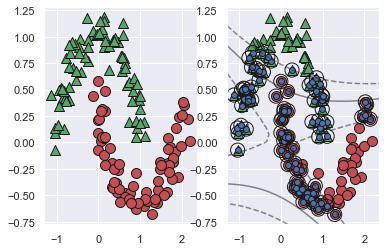

In [199]:
plt.subplot(1,2,1)
plot_scatter_plot()

plt.subplot(1,2,2)
plot_scatter_plot()
plot_svc_decision_function(model);
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],facecolor='b',edgecolors='k')

In [200]:
#10-fold Cross Validation.
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=10)
result=cross_val_score(model,X_test,y_test,cv=kf)
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.6799999999999999


In [201]:
#Predicting the outputs using the built model.
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(model,X_train,y_train,cv=10)

#Confusion Matrix and Accuracy Scores.
from sklearn.metrics import confusion_matrix,accuracy_score
confusion=confusion_matrix(y_train,y_train_pred)
print(confusion)
accuracy=accuracy_score(y_train,y_train_pred)
print("Accuracy: ",accuracy)


[[50 27]
 [ 3 70]]
Accuracy:  0.8


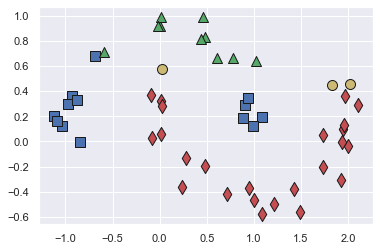

In [202]:
#Plotting the Predicted Model.
y_predict=model.predict(X_test)
plot_predictions()

<AxesSubplot:>

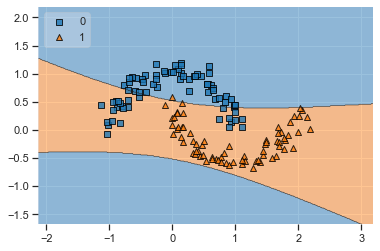

In [203]:
#plotting the Decision Regions.
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train,clf=model,legend=2)

In [204]:
#Cubic SVM.
model=SVC(kernel='poly',degree=3)
model.fit(X_train,y_train)

SVC(kernel='poly')

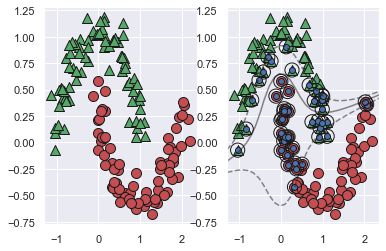

In [205]:
plt.subplot(1,2,1)
plot_scatter_plot()

plt.subplot(1,2,2)
plot_scatter_plot()
plot_svc_decision_function(model);
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],edgecolors='k',facecolor='b')

In [206]:
#10-fold Cross Validation.
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=10)
result=cross_val_score(model,X_test,y_test,cv=kf)
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.74


In [207]:
#Predicting the outputs using the built model.
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(model,X_train,y_train,cv=10)

#Confusion Matrix and Accuracy Scores.
from sklearn.metrics import confusion_matrix,accuracy_score
confusion=confusion_matrix(y_train,y_train_pred)
print(confusion)
accuracy=accuracy_score(y_train,y_train_pred)
print("Accuracy: ",accuracy)

[[70  7]
 [ 0 73]]
Accuracy:  0.9533333333333334


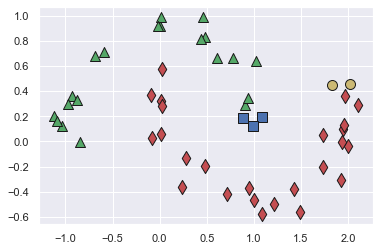

In [208]:
#Plotting the predicted labels.
y_predict=model.predict(X_test)
plot_predictions()

<AxesSubplot:>

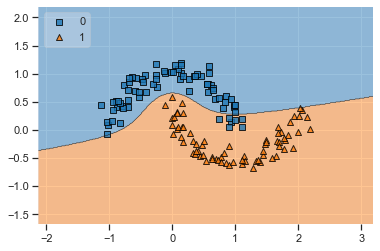

In [209]:
#Plotting the decision regions.
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train,clf=model,legend=2)

In [210]:
#Gaussian SVM.
model=SVC(kernel='rbf')
model.fit(X_train,y_train)

SVC()

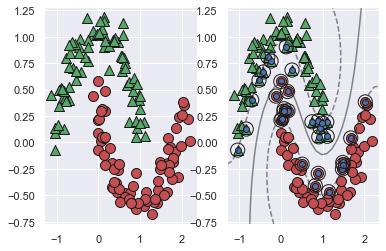

In [211]:
plt.subplot(1,2,1)
plot_scatter_plot()

plt.subplot(1,2,2)
plot_scatter_plot()
plot_svc_decision_function(model);
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],facecolor='b',edgecolors='k')

In [212]:
#10-fold cross-validation.
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=10)
result=cross_val_score(model,X_test,y_test,cv=kf)
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9800000000000001


In [213]:
#Predicting the outputs using the built model.
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(model,X_train,y_train,cv=10)

#Confusion Matrix and Accuracy Scores.
from sklearn.metrics import confusion_matrix,accuracy_score
confusion=confusion_matrix(y_train,y_train_pred)
print(confusion)
accuracy=accuracy_score(y_train,y_train_pred)
print("Accuracy: ",accuracy)

[[77  0]
 [ 2 71]]
Accuracy:  0.9866666666666667


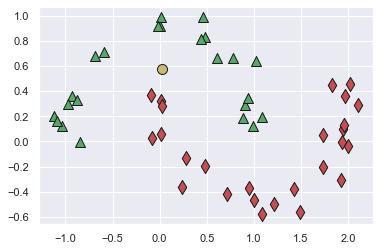

In [214]:
#Plotting the predicted labels.
y_predict=model.predict(X_test)
plot_predictions()

<AxesSubplot:>

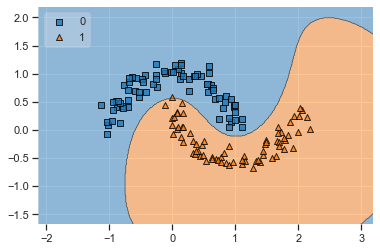

In [215]:
#Plotting the decision regions.
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train,clf=model,legend=2)

In [216]:
'''Comparison of Results:
1.Linear SVM:
->Accuracy: 0.87
->Confusion Matrix:
 [63 10]
 [ 9 68]

2.Quadratic SVM:
->Accuracy: 0.72
->Confusion Matrix:
 [42 31]
 [ 1 76]

3.Cubic SVM:
->Accuracy: 0.96
->Confusion Matrix:
 [64  9]
 [ 1 76]
 
4.Gaussian SVM:
->Accuracy: 0.98
->Confusion Matrix:
 [72  1]
 [ 2 75]
 
 Conclusion: Gaussian SVM works best for this data, followed by Cubic and Linear. Quadratic SVM is the worst performer.'''

'Comparison of Results:\n1.Linear SVM:\n->Accuracy: 0.87\n->Confusion Matrix:\n [63 10]\n [ 9 68]\n\n2.Quadratic SVM:\n->Accuracy: 0.72\n->Confusion Matrix:\n [42 31]\n [ 1 76]\n\n3.Cubic SVM:\n->Accuracy: 0.96\n->Confusion Matrix:\n [64  9]\n [ 1 76]\n \n4.Gaussian SVM:\n->Accuracy: 0.98\n->Confusion Matrix:\n [72  1]\n [ 2 75]\n \n Conclusion: Gaussian SVM works best for this data, followed by Cubic and Linear. Quadratic SVM is the worst performer.'

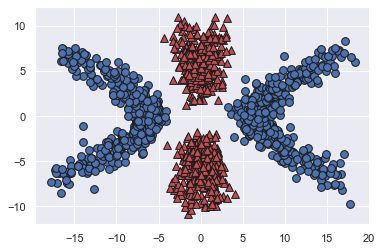

In [217]:
t = np.arange(-2, 2, 0.01)
N = t.size
a = 0.5
b = 2
c = 4
d = 2
h = 2
k = 2

x_1 = np.array([a*np.sinh(t), k+b*np.cosh(t), a*np.sinh(t), -k-b*np.cosh(t)]).T 
y_2 = np.array([h+c*np.cosh(t), d*np.sinh(t), -h-c*np.cosh(t), d*np.sinh(t)]).T 

class_1=np.concatenate((x_1[:,0:2],x_1[:,2:4]),axis=0)
class_2=np.concatenate((y_2[:,0:2],y_2[:,2:4]),axis=0)

#add noise
class_1 += np.random.normal(0, 1, class_1.shape)
class_2 += np.random.normal(0, 0.9, class_2.shape)

X=np.concatenate((class_1,class_2),axis=0)

y_1=np.ones((2*N,1),dtype=int)
y_2=np.zeros((2*N,1),dtype=int)

y=np.concatenate((y_1,y_2),axis=0)
y=np.ravel(y, order = 'C')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#plot
plt.scatter(class_1[:,0], class_1[:,1],edgecolors='k',facecolor='r',marker='^',s=60)
plt.scatter(class_2[:,0], class_2[:,1],edgecolors='k',facecolor='b',marker='o',s=60)
plt.show()

In [218]:
#Linear Discriminant Analysis.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model=LinearDiscriminantAnalysis()
X_LDA=model.fit_transform(X_train,y_train)

In [219]:
#10-fold Cross-validation.
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=10)
result=cross_val_score(model,X_test,y_test,cv=kf)
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.45


In [220]:
#Predicting the outputs using the built model.
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(model,X_train,y_train,cv=10)

#Confusion Matrix and Accuracy Scores.
from sklearn.metrics import confusion_matrix,accuracy_score
confusion=confusion_matrix(y_train,y_train_pred)
print(confusion)
accuracy=accuracy_score(y_train,y_train_pred)
print("Accuracy: ",accuracy)

[[383 222]
 [336 259]]
Accuracy:  0.535


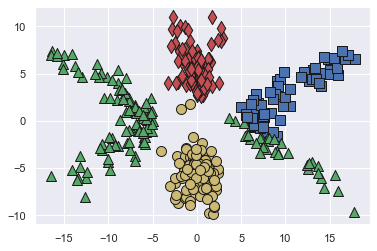

In [221]:
#Plotting the predicted labels.
y_predict=model.predict(X_test)
plot_predictions()

<AxesSubplot:>

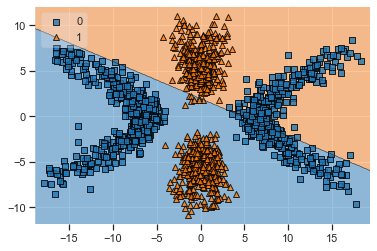

In [222]:
#Plotting the decision regions.
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y,clf=model,legend=2)

In [223]:
#Quadratic Discriminant Analysis.
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model=QuadraticDiscriminantAnalysis()
X_QDA=model.fit(X_train,y_train)

In [224]:
#10-fold Cross-validation.
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=10)
result=cross_val_score(model,X_test,y_test,cv=kf)
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.99


In [225]:
#Predicting the outputs using the built model.
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(model,X_train,y_train,cv=10)

#Confusion Matrix and Accuracy Scores.
from sklearn.metrics import confusion_matrix,accuracy_score
confusion=confusion_matrix(y_train,y_train_pred)
print(confusion)
accuracy=accuracy_score(y_train,y_train_pred)
print("Accuracy: ",accuracy)

[[605   0]
 [ 13 582]]
Accuracy:  0.9891666666666666


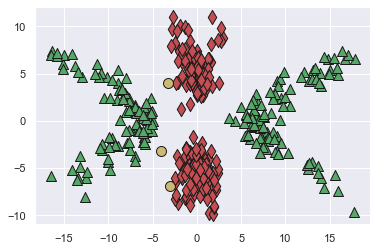

In [226]:
#Plotting the predicted labels.
y_predict=model.predict(X_test)
plot_predictions()

<AxesSubplot:>

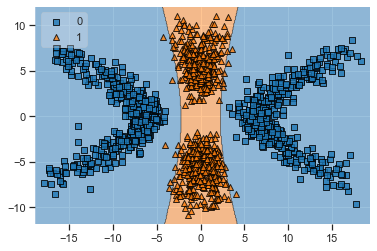

In [227]:
#Plotting the decision regions.
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y,clf=model,legend=2)

In [228]:
#Polynomial SVM
model=SVC(kernel='poly',degree=2)
model.fit(X_train,y_train)

SVC(degree=2, kernel='poly')

In [229]:
#10-fold cross-validation.
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=10)
result=cross_val_score(model,X_test,y_test,cv=kf)
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9974999999999999


In [230]:
#Predicting the outputs using the built model.
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(model,X_train,y_train,cv=10)

#Confusion Matrix and Accuracy Scores.
from sklearn.metrics import confusion_matrix,accuracy_score
confusion=confusion_matrix(y_train,y_train_pred)
print(confusion)
accuracy=accuracy_score(y_train,y_train_pred)
print("Accuracy: ",accuracy)

[[604   1]
 [  0 595]]
Accuracy:  0.9991666666666666


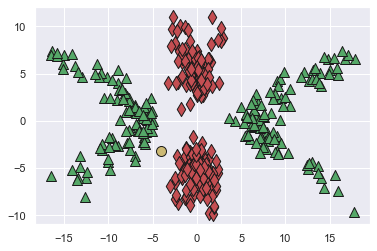

In [231]:
#Plotting the predicted labels.
y_predict=model.predict(X_test)
plot_predictions()

<AxesSubplot:>

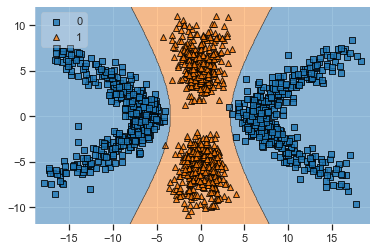

In [232]:
#Plotting the decision regions.
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y,clf=model,legend=2)

In [233]:
#k-NN
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=2)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [234]:
#10-fold cross-validation.
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=10)
result=cross_val_score(model,X_test,y_test,cv=kf)
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9974999999999999


In [235]:
#Predicting the outputs using the built model.
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(model,X_train,y_train,cv=10)

#Confusion Matrix and Accuracy Scores.
from sklearn.metrics import confusion_matrix,accuracy_score
confusion=confusion_matrix(y_train,y_train_pred)
print(confusion)
accuracy=accuracy_score(y_train,y_train_pred)
print("Accuracy: ",accuracy)

[[604   1]
 [  0 595]]
Accuracy:  0.9991666666666666


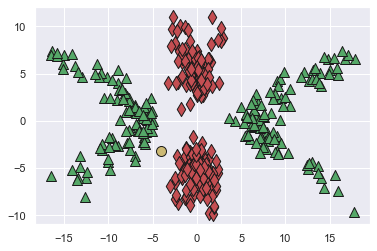

In [236]:
#Plotting the predicted labels.
y_predict=model.predict(X_test)
plot_predictions()

<AxesSubplot:>

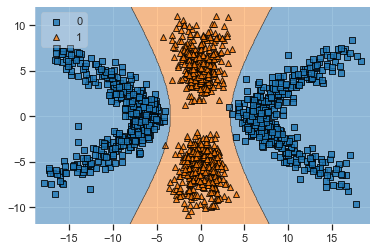

In [237]:
#Plottig the decision regions.
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y,clf=model,legend=2)

In [ ]:
'''Comparison of Results:
1.Linear Discriminant Analysis:
->Accuracy: 0.53
->Confusion Matrix:
 [383 222]
 [336 259]

2.Quadratic Discriminant:
->Accuracy: 0.98
->Confusion Matrix:
 [605   0]
 [ 13 582]

3.Polynomial Kernel:
->Accuracy: 0.99
->Confusion Matrix:
 [604   1]
 [  0 595]
 
4.k-NN:
->Accuracy: 0.99
->Confusion Matrix:
 [604   1]
 [  0 595]
 
 Conclusion: k-NN works best for this data, followed by Poly SVM and Quadratic Discriminant. Linear SVM is the worst performer.'''